In [1]:
import pandas as pd

In [2]:
wq_red = pd.read_csv('data/winequality-red.csv')
wq_white = pd.read_csv('data/winequality-white.csv', sep=';')
diabetes = pd.read_csv('data/diabetes.csv')

In [3]:
# reduce wq white to 1000 samples
wq_white = wq_white.sample(n=1000, random_state=1)
wq_red = wq_red.sample(n=1000, random_state=1)

In [4]:
X_red_wine = wq_red.drop('quality', axis=1).to_numpy()
y_red_wine = wq_red['quality'].to_numpy()
X_white_wine = wq_white.drop('quality', axis=1).to_numpy()
y_white_wine = wq_white['quality'].to_numpy()
X_diabetes = diabetes.drop('Outcome', axis=1).to_numpy()
y_diabetes = diabetes['Outcome'].to_numpy()

In [5]:
X_values = [X_red_wine, X_white_wine, X_diabetes]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i, X in enumerate(X_values):
    X_values[i] = scaler.fit_transform(X)

3.1 Generate a scatterplot matrix comparing the results of your implementation of Sammon Mapping with PCA and
t-SNE for each data set. The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a
DR technique applied to a data set. Color the points by their target variables (i.e., class/labels) using a qualitative
colormap.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import Functions as f

In [8]:
iterations = 100
error = 0.0001
alpha = 0.1

In [9]:
results = f.generate_dr_results(X_values, iterations, error, alpha)

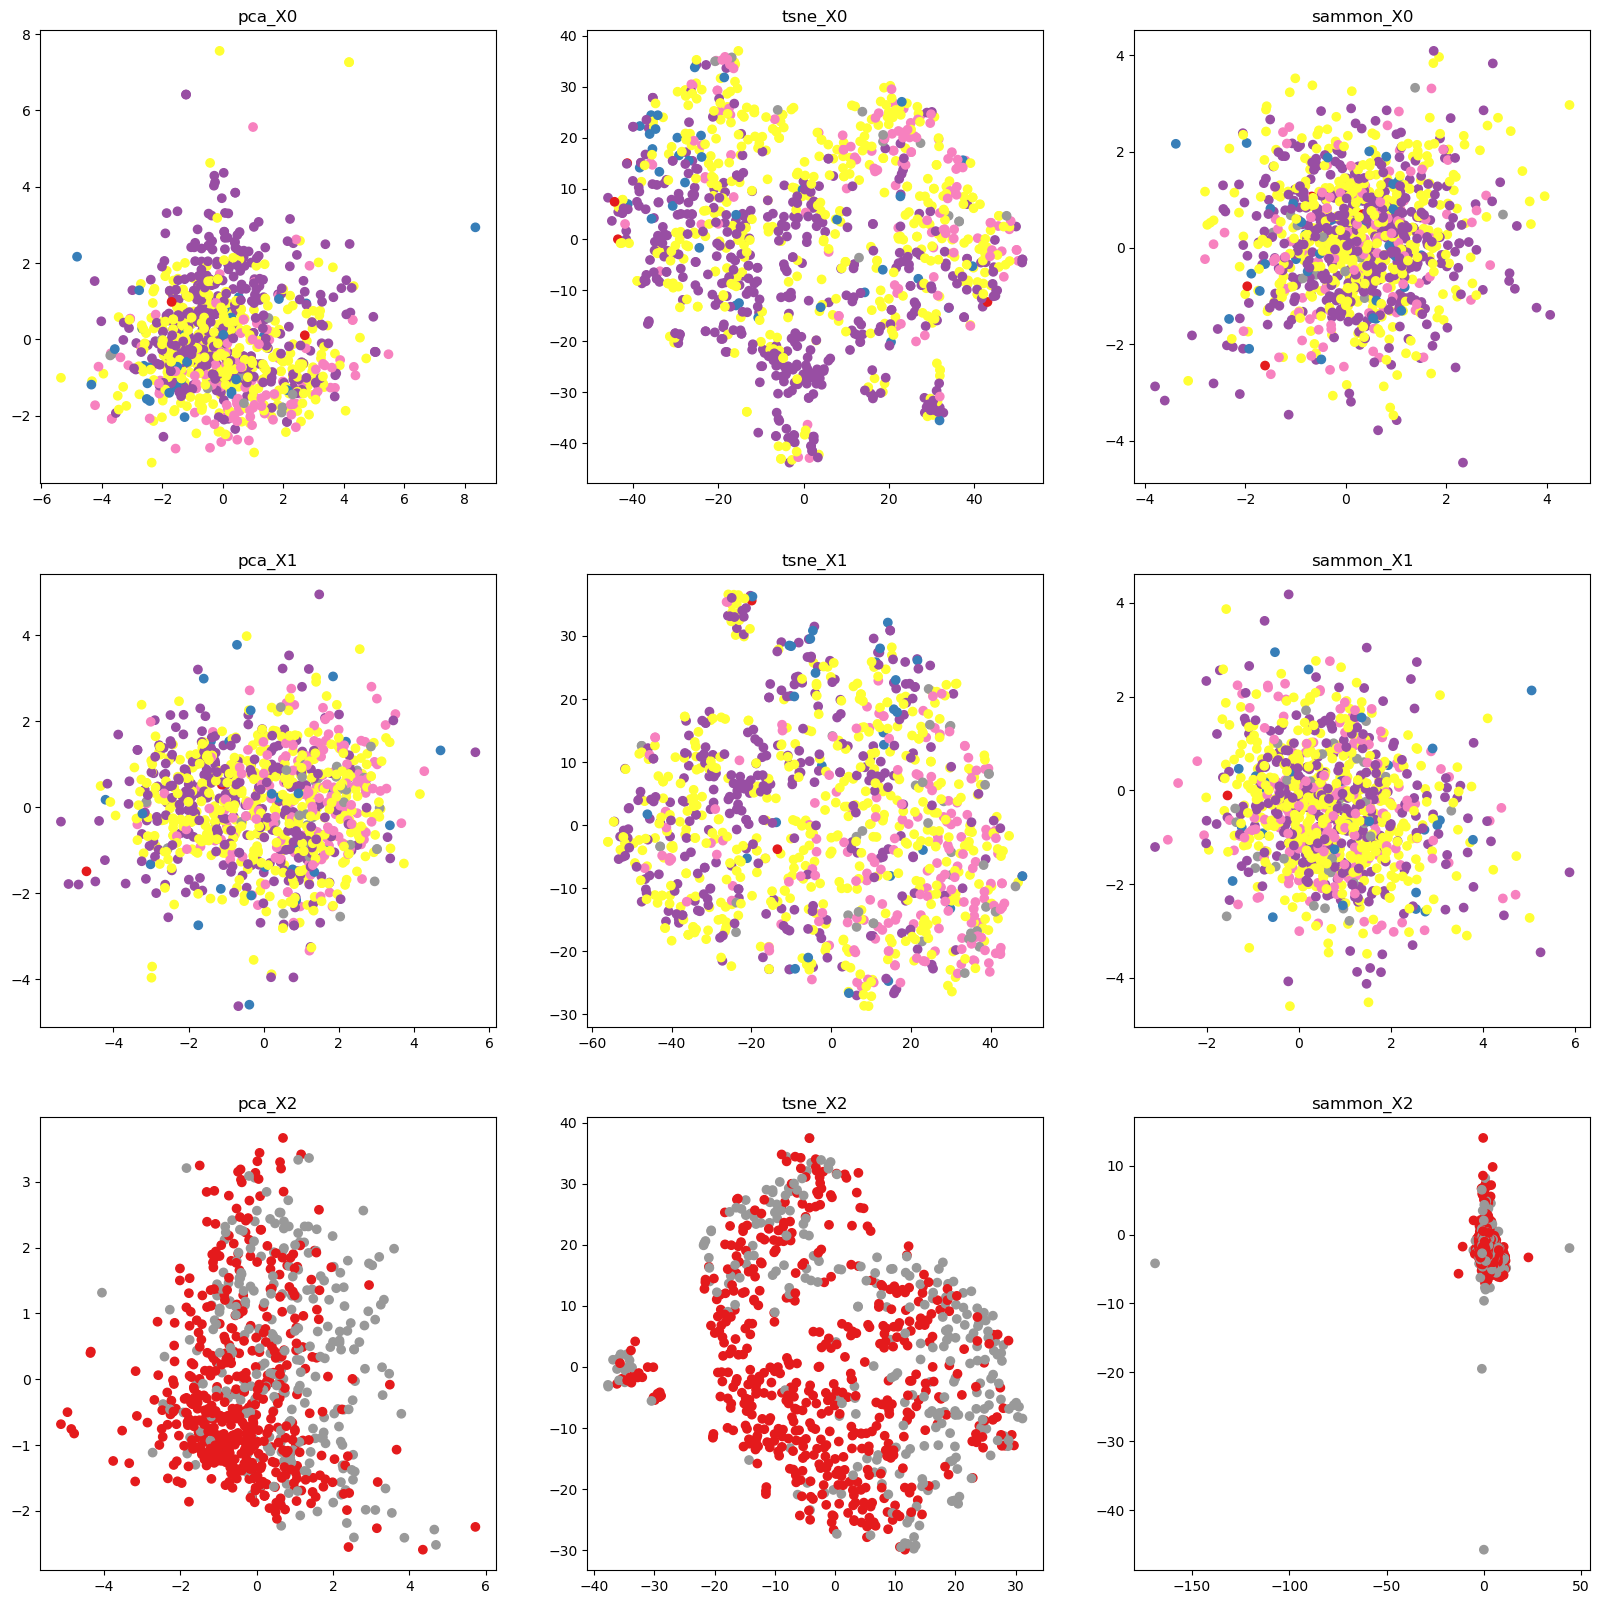

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i in range(9):
    result = list(results.values())[i]
    y = np.empty(result.shape[0])
    if i < 3 :
        y = y_red_wine
    elif i < 6:
        y = y_white_wine
    else:
        y = y_diabetes
    axes[i//3, i%3].scatter(result[:, 0], result[:, 1], c=y, cmap='Set1')
    axes[i//3, i%3].set_title(list(results.keys())[i])


3.2 Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g.,
https://matplotlib.org/tutorials/colors/colormaps.html).
Then answer this shortly (in a couple of paragraphs): In your opinion, which clustering technique performed the
best for each data set? How are the clusters in the data sets separated? Are some clusters easier to separate than
others?
